In [41]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Training data
x_train = np.array([
    [0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5],
    [3.5, 1], [2.5, 3], [3, 3], [2, 1], [1, 3], [4, 0.5],
    [0.5, 2], [1.5, 1.8], [3.5, 2.5], [3, 1.5], [2.2, 2.8], [2.8, 1.3]
])

y_train = np.array([
    0, 0, 0, 1, 1, 1,
    1, 1, 1, 0, 0, 1,
    0, 0, 1, 1, 1, 1
])

In [43]:
""" All Helper Methods """

# Logistic function f(x) = 1 / (1 + e ^ -(w * x + b))
def f(w: list, b, x: list):
    lin = np.dot(w, x) + b
    return 1 / (1 + np.exp(-lin))

# Cost function (still needs to be vectorized, aka avoid loops)
def cost(w, b, x, y):
    # Necessary vars
    m = x.shape[0]

    # Finding sum of all loss
    cost = 0
    for i in range(m): # for each piece of training data
        loss = - y[i] * np.log(f(w, b, x[i])) - (1 - y[i]) * np.log(1 - f(w, b, x[i]))
        cost += loss
        
    return cost / m # Returning average loss (or cost)

# Gradients (dJ_dw and dJ_db)
def gradients(w, b, x, y):
    m, n = x.shape
    dJ_dw = np.zeros(n)
    dJ_db = 0

    for i in range(m): # for each piece of training data
        diff = f(w, b, x[i]) - y[i]
        for j in range(n): # for each feature
            dJ_dw[j] += diff * x[i][j]
        dJ_db += diff

    return dJ_dw / m, dJ_db / m

# Gradient descent
def gradient_descent(w, b, x, y, alpha, loops):
    m, n = x.shape
    
    for _ in range(loops):
        dJ_dw, dJ_db = gradients(w, b, x, y)

        w -= alpha * dJ_dw # vectorized
        b -= alpha * dJ_db

    return w, b

# Modified gradient descent to track cost --- courtesy of GPT
def gradient_descent_track_cost(w, b, x, y, alpha, loops):
    m = x.shape[0]
    cost_history = []
    
    for _ in range(loops):
        dJ_dw, dJ_db = gradients(w, b, x, y)
        w -= alpha * dJ_dw
        b -= alpha * dJ_db
        c = cost(w, b, x, y)
        cost_history.append(c)
    
    return w, b, cost_history

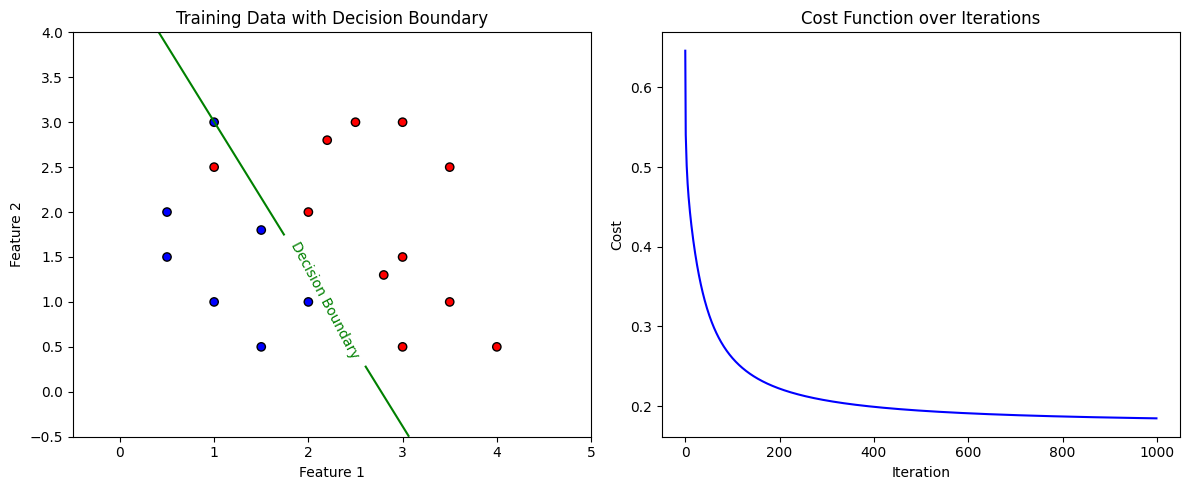

Training accuracy: 94.44%


In [50]:
# Setup variables
m, n = x_train.shape
w = np.zeros(n)
b = 0
alpha = 1
loops = 1000

# Run gradient descent and track cost
w, b, cost_history = gradient_descent_track_cost(w, b, x_train, y_train, alpha, loops)

# Create subplot figure with 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training data with decision boundary on left
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Training Data with Decision Boundary')

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([f(w, b, point) for point in grid_points])
Z = Z.reshape(xx.shape)

contour = ax1.contour(xx, yy, Z, levels=[0.5], colors='green')
ax1.clabel(contour, fmt='Decision Boundary', inline=True)

# Plot cost curve on right
ax2.plot(range(loops), cost_history, color='blue')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Cost Function over Iterations')

plt.tight_layout()
plt.show()

# Prediction function and accuracy calculation (unchanged)
def predict(w, b, x):
    return 1 if f(w, b, x) >= 0.5 else 0

correct = 0
for i in range(m):
    pred = predict(w, b, x_train[i])
    if pred == y_train[i]:
        correct += 1

accuracy = correct / m
print(f"Training accuracy: {accuracy:.2%}")
